In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
df=pd.read_csv('USA_Housing.csv')

In [14]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
df.shape

(5000, 7)

In [17]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [18]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [20]:
df.corr()

C:\Users\rachi\AppData\Local\Temp\ipykernel_4904\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


C:\Users\rachi\AppData\Local\Temp\ipykernel_4904\1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

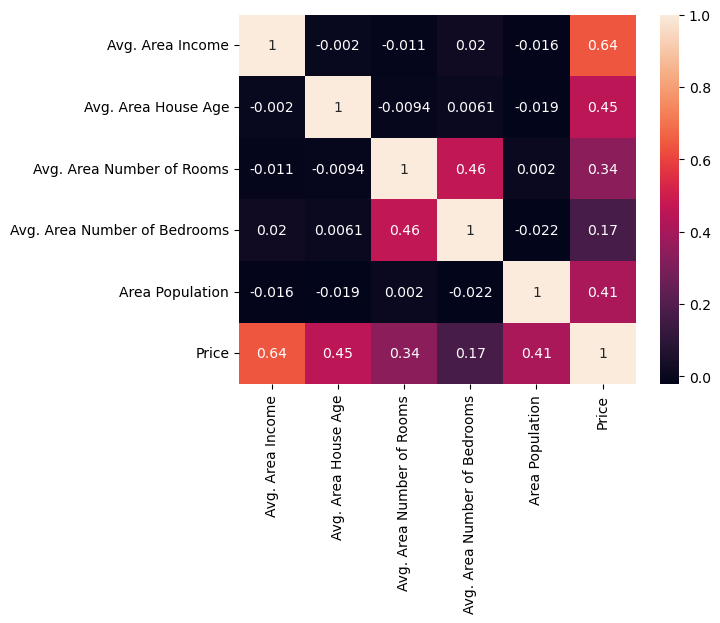

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [37]:
df.drop('Address',axis='columns',inplace=True)

In [38]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [47]:
X=df.drop('Price',axis='columns')
y=df.Price

In [45]:
from sklearn.model_selection import train_test_split as tts

In [55]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=10)

In [57]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2733,69180.016069,6.583566,5.514897,2.29,38114.526330
447,60893.764084,4.128880,7.522949,5.18,49076.757352
970,76114.159362,6.769699,7.321610,5.02,42601.815301
125,71202.956920,4.318869,6.634954,4.37,34207.397208
798,67125.149833,4.969943,7.639188,5.37,22651.111354
...,...,...,...,...,...
1180,72695.115137,5.363777,6.871980,4.24,48115.420780
3441,75479.767453,6.009215,6.475022,4.26,18537.430799
1344,70670.878894,6.581627,6.477495,3.17,23592.157588
4623,73804.908618,6.731999,7.617261,4.25,40877.189120


In [58]:
y_test

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
877     7.621449e+05
1314    8.958456e+05
2344    1.451931e+06
2717    1.068787e+06
4662    1.571848e+06
Name: Price, Length: 1000, dtype: float64

In [60]:
from sklearn import linear_model

In [61]:
model=linear_model.LinearRegression()

In [62]:
model.fit(X_train,y_train)

LinearRegression()

In [63]:
model.predict(X_test)

array([1195058.57686783, 1185265.81533396, 1046786.1891214 ,
        827779.10087174, 1485163.51852816,  542138.6765691 ,
       2473734.91051553, 1447749.45072347, 1322766.64693218,
       1137661.55592708, 1373281.53329682, 1719966.993195  ,
       1372477.12886963,  521453.39951925, 1412349.85322234,
       1074289.43772206,  959129.69791312, 1125293.74910394,
       1281045.09627657, 1009354.62576318,  788527.6123704 ,
       1070710.32466437, 1286070.31346662, 1054795.95470597,
       1248708.19974993, 1446840.10401856,  376036.04699452,
       1275418.65003587, 1204407.28849145, 1500191.62082186,
       1634136.01083355, 1579737.86341584, 1492533.30221776,
        380169.03592378, 1813542.15699052, 1216232.59480263,
       1556216.56637977, 1070938.68276499, 1231003.47995484,
       1076791.63249559, 1005529.40900246, 1788883.43344519,
       1037652.18880177, 1435240.71183994,  833401.6925895 ,
        888585.17957249, 1135122.87341   ,  906362.57346554,
       1315708.06079083,

In [67]:
str=str(model.score(X_test,y_test)*100)+'%'

In [71]:
print('The model is {} accurate.'.format(str))

The model is 91.9742195833928% accurate.
